# Capstone Report



My chosen data set is Austin TX Restaurant Inspection Scores for 2014-2017.

This data set was gathered from the data.austintexas.gov and it covers restaurant inspection scores for the last 3 years. The data is given freely by the city of Austin with no restrictions on use. One note about this data set is it is a rolling 3 year calendar and so the data for the begining half of 2014 was not included in the set I gathered.  

One of the reasons I chose restaurant inspection scores is that they can give us insight into the health, cleanliness, and sanitation practices of different restaurants. The accumulation of scores over time allow us to see larger patterns emerge, usually indicating well run, or not-so-well run, restaurants. The significance of knowing the health inspection scores is important to consumers because the general public is typically not allowed into the production or storage area of any given restaurant and therefor cannot validate for themselves the sanitation or cleanliness of said establishment. The restaurant inspection scores, which are public knowledge, give the lay man an indication of if that restaurant runs a sanitary establishment or not. A few things to note about how these scores are acheived from the Austintexas.gov website. "If no violations are found, a score of 100 is achieved. If more than 30 points are lost, a re-inspection is required and corrections must be made to bring the score above 70, in accordance with the Texas Food Establishment Rules. If subsequent inspections score below 70, compliance actions will be taken."


The three questions I aim to answer with this data set are:
- What is the percentage of failed restaurants per year?
- What is the average score of all passing restaurants in Austin? Per year? 
- Are there restaurants that have failed more than once?

In [229]:
# First, set up my working environment.
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime 
from collections import Counter
%matplotlib inline 

In [180]:
# I input the raw data and then check the column names, 
# so I can correctly call them later. 
res_df = pd.read_csv('Restaurant_Inspection_Scores.csv')
list(res_df.columns.values)

['Restaurant Name',
 'Zip Code',
 'Inspection Date',
 'Score',
 'Address',
 'Facility ID',
 'Process Description']

In [181]:
# Next is to check what the first few lines look like.
res_df.head()


,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,183 Grill Austin Gyros,78729,01/28/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection
1,183 Grill Austin Gyros,78729,04/10/2017,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection
2,183 Grill Austin Gyros,78729,08/08/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection
3,15th Street Cafe,78701,11/10/2015,86,"303 W 15TH ST\nAUSTIN, TX 78701\n(30.277693, -...",2801033,Routine Inspection
4,2 Dine 4 Fine Catering,78702,05/18/2015,87,"3008 GONZALES ST\nAUSTIN, TX 78702\n(30.259363...",2802035,Routine Inspection


# Exploring the data

Now that I've seen the first few lines of my data frame, time to explore the data.  First, I want to see where all the scores for my entire data set fall. This will tell me which scores occur most often. I decided to break the data up into 20 bins. 

(array([  1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   1.20000000e+01,
          1.90000000e+01,   3.50000000e+01,   4.40000000e+01,
          4.20000000e+01,   3.13000000e+02,   4.46000000e+02,
          5.85000000e+02,   9.75000000e+02,   1.40500000e+03,
          2.72900000e+03,   3.08600000e+03,   3.81000000e+03,
          4.04500000e+03,   7.77700000e+03]),
 array([  36. ,   39.2,   42.4,   45.6,   48.8,   52. ,   55.2,   58.4,
          61.6,   64.8,   68. ,   71.2,   74.4,   77.6,   80.8,   84. ,
          87.2,   90.4,   93.6,   96.8,  100. ]),
 <a list of 20 Patch objects>)

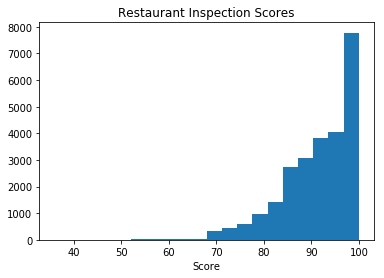

In [182]:
score = res_df['Score']
plt.title('Restaurant Inspection Scores')
plt.xlabel('Score')
plt.hist(score, bins=20)

Getting a look at this histogram for all the scores in the data set tells me that the vast majority of scores are nearly 100. And it also reveals that actually nearly all the scores in the data set are over 70, a passing score for restaurant inspections. It also reveals a few very far outliers. I decided to use a boxplot to look another look at the data as a whole before breaking it up by year.

{'boxes': [<matplotlib.lines.Line2D at 0x10ba85eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x10b4c95f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b4d1da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b4d16a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10ba85048>,
  <matplotlib.lines.Line2D at 0x10b4c1b00>]}

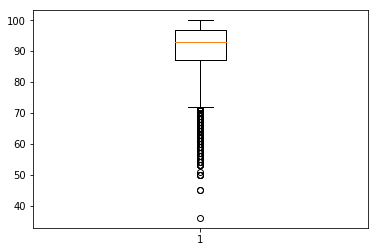

In [183]:
plt.boxplot(score)

The boxplot revealed a number of very, very far outliers. One with a score of 36! But I have a few basic questions before I dive too deep into the outliers. How many restaurants are in the data set? 

In [184]:
# Check to see the number of unique restaurant names that occur in the dataframe
restaurants = res_df['Restaurant Name'].unique()
len(restaurants)

4499

In [185]:
pd.to_datetime(res_df['Inspection Date']) # change the inspection date to a datetime object

0       2016-01-28
1       2017-04-10
2       2016-08-08
3       2015-11-10
4       2015-05-18
5       2016-07-11
6       2017-04-13
7       2016-10-21
8       2015-04-27
9       2016-05-02
10      2014-07-25
11      2015-10-21
12      2016-10-24
13      2014-12-15
14      2016-02-08
15      2015-02-10
16      2016-07-08
17      2015-08-12
18      2014-09-12
19      2016-12-15
20      2017-01-23
21      2016-01-25
22      2015-03-05
23      2015-07-27
24      2016-07-28
25      2014-09-09
26      2015-04-13
27      2015-01-29
28      2017-02-03
29      2016-03-16
           ...    
25301   2017-03-20
25302   2017-03-17
25303   2016-03-16
25304   2015-09-11
25305   2016-04-01
25306   2017-01-31
25307   2017-05-01
25308   2016-06-09
25309   2017-01-17
25310   2015-09-01
25311   2015-07-24
25312   2014-09-27
25313   2016-03-24
25314   2014-10-09
25315   2014-09-30
25316   2015-11-17
25317   2017-04-05
25318   2016-01-22
25319   2016-11-22
25320   2014-07-31
25321   2016-09-22
25322   2016

In [186]:
# Adding a month and year column to the data frame and checking the first 5 lines
res_df['year'] = pd.DatetimeIndex(res_df['Inspection Date']).year
res_df['month'] = pd.DatetimeIndex(res_df['Inspection Date']).month
res_df.head() 

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,year,month
0,183 Grill Austin Gyros,78729,01/28/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection,2016,1
1,183 Grill Austin Gyros,78729,04/10/2017,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection,2017,4
2,183 Grill Austin Gyros,78729,08/08/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection,2016,8
3,15th Street Cafe,78701,11/10/2015,86,"303 W 15TH ST\nAUSTIN, TX 78701\n(30.277693, -...",2801033,Routine Inspection,2015,11
4,2 Dine 4 Fine Catering,78702,05/18/2015,87,"3008 GONZALES ST\nAUSTIN, TX 78702\n(30.259363...",2802035,Routine Inspection,2015,5


Now that there is a 'year' column, I can separate the data based on year and look more closely at it. First up is to see what the difference in size is for each of our new data frames. To do this, I simply plotted the year in a histogram. It looks as expected, with 2014 and 2017 being roughly half of what 2015 and 2016 are. Next is to take a look at what the scores for each year are. Even though we do not have a complete data set for 2014 or 2017, we can still look and see where the scores we do have fall. 

(array([ 4206.,     0.,     0.,  8756.,     0.,     0.,  8673.,     0.,
            0.,  3696.]),
 array([ 2014. ,  2014.3,  2014.6,  2014.9,  2015.2,  2015.5,  2015.8,
         2016.1,  2016.4,  2016.7,  2017. ]),
 <a list of 10 Patch objects>)

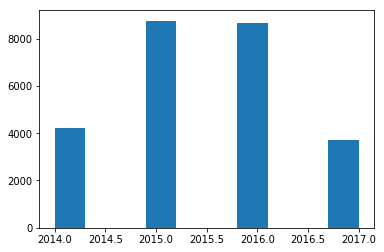

In [187]:
plt.hist(res_df['year'])

In [188]:
# Separating the data frame into the different years
year_2017 = res_df[res_df['year'] == 2017]
year_2016 = res_df[res_df['year'] == 2016]
year_2015 = res_df[res_df['year'] == 2015]
year_2014 = res_df[res_df['year'] == 2014]


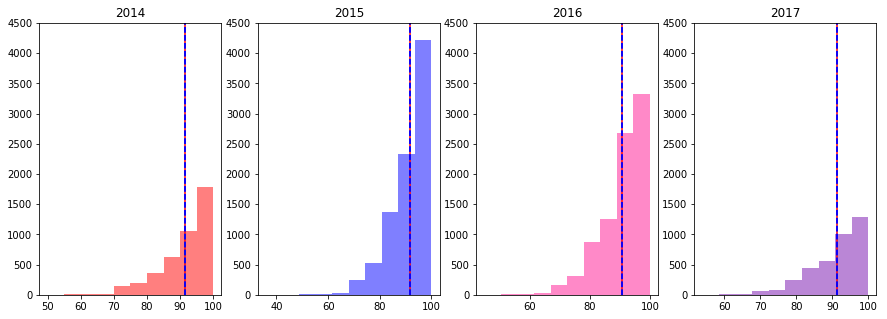

In [246]:
# Showing scores by year, with the mean and standard deviation plotted for each year
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.hist(year_2014['Score'], color='red', alpha=.5)
plt.ylim(0, 4500)
mean2014 = np.mean(year_2014['Score'])
st_dev2014 = np.std(mean2014)
plt.axvline(x=mean2014, color='red')
plt.axvline(x=(mean2014 + st_dev2014), color='blue', linestyle='--')
plt.axvline(x=(mean2014 - st_dev2014), color='blue', linestyle='--')
plt.title('2014')

plt.subplot(1, 4, 2)
plt.hist(year_2015['Score'], color='blue', alpha=.5)
plt.ylim(0, 4500)
mean2015 = np.mean(year_2015['Score'])
st_dev2015 = np.std(mean2015)
plt.axvline(x=mean2015, color='red')
plt.axvline(x=(mean2015 + st_dev2015), color='blue', linestyle='--')
plt.axvline(x=(mean2015 - st_dev2015), color='blue', linestyle='--')
plt.title('2015')

plt.subplot(1, 4, 3)
plt.hist(year_2016['Score'], color='#FF1493', alpha=.5)
plt.ylim(0, 4500)
mean2016 = np.mean(year_2016['Score'])
st_dev2016 = np.std(mean2016)
plt.axvline(x=mean2016, color='red')
plt.axvline(x=(mean2016 + st_dev2016), color='blue', linestyle='--')
plt.axvline(x=(mean2016 - st_dev2016), color='blue', linestyle='--')
plt.title('2016')


plt.subplot(1, 4, 4)
plt.hist(year_2017['Score'], color='#770FAF', alpha=.5)
plt.ylim(0, 4500)
mean2017 = np.mean(year_2017['Score'])
st_dev2017 = np.std(mean2017)
plt.axvline(x=mean2017, color='red')
plt.axvline(x=(mean2017 + st_dev2016), color='blue', linestyle='--')
plt.axvline(x=(mean2017 - st_dev2016), color='blue', linestyle='--')
plt.title('2017')

plt.show()

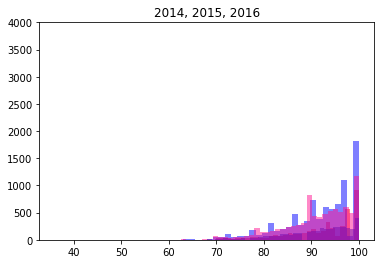

In [205]:
# Another view of the same data, laid on top of one another. This is not quite as easy to understand as the other charts
plt.hist(year_2014['Score'], bins=50, color='red', alpha=.5)
plt.hist(year_2015['Score'], bins=50, color='blue', alpha=.5)
plt.hist(year_2016['Score'], bins=50, color='#FF1493', alpha=.5)
plt.hist(year_2017['Score'], bins=50, color='#770FAF', alpha=.5)
plt.ylim(0, 4000)
plt.title('2014, 2015, 2016')

plt.show()

In [191]:
# Separating out the failed inspections and the passing inspections
fail_2017 = year_2017[year_2017['Score'] < 70]
fail_2016 = year_2016[year_2016['Score'] < 70]
fail_2015 = year_2015[year_2015['Score'] < 70]
fail_2014 = year_2014[year_2014['Score'] < 70]

pass_2017 = year_2017[year_2017['Score'] > 70]
pass_2016 = year_2016[year_2016['Score'] > 70]
pass_2015 = year_2015[year_2015['Score'] > 70]
pass_2014 = year_2014[year_2014['Score'] > 70]


# Asking analytical questions 
Now that we've separated the different years into passing and failing dataframes, we can compare them to find out some basic information and begin to tackle our questions. 

First, what percentage of restaurants failed their inspections per year? 

Rounding to the nearest 100th percentile,
- 2014 Failure rate is 1.02%
- 2015 Failure rate is 0.66%
- 2016 Failure rate is 0.69%
- 2017 Failure rade is 0.62% 

In [192]:
fail_percent_2017 = len(fail_2017) / len(year_2017)
fail_percent_2017

0.006222943722943723

In [193]:
fail_percent_2016 = len(fail_2016) / len(year_2016)
fail_percent_2016

0.0069180214458664825

In [194]:
fail_percent_2015 = len(fail_2015) / len(year_2015)
fail_percent_2015

0.006624029237094564

In [195]:
fail_percent_2014 = len(fail_2014) / len(year_2014)
fail_percent_2014

0.010223490252020923

We know that Austin's restaurants have a failure rate of less than 1% per year. What's the average passing score? 

To find that out, I simply checked the mean of my data frames that had only passing scores.  

The average passing score per year:
- 2014 is 91.96
- 2015 is 91.97
- 2016 is 91.25
- 2017 is 91.60

In [239]:
average_2017 = np.mean(pass_2017['Score'])
average_2016 = np.mean(pass_2016['Score'])
average_2015 = np.mean(pass_2015['Score'])
average_2014 = np.mean(pass_2014['Score'])
print(average_2017, average_2016, average_2015, average_2014)


91.6019709828 91.2503509593 91.97329171 91.9649419729


Both the average passing score and failure rate for each year seems to be consistent from one year to the next.

Last question, are there any restaurants that have failed more than once in the last 3 years? 

In [233]:
repeat_offenders_2017 = fail_2017['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2017).items() if v>1]

[]

In [226]:
repeat_offenders_2016 = fail_2016['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2016).items() if v>1]

['Curras Grill', "Madam Mam's", 'Pho Thaison', 'Star of India Rest.&Bar']

In [224]:
repeat_offenders_2015 = fail_2015['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2015).items() if v>1]

['Crawfish Shack and Oyster Bar',
 'Midtown Live',
 '888 Vietnamese',
 "Ken's Donuts"]

In [225]:
repeat_offenders_2014 = fail_2014['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2014).items() if v>1]

['Pad Thai']

# Further Research

Some questions I was not able to answer in this exploration of the data are 'Where are the failed restaurants located on a map? Are they near each other? Do the failed scores occur in less affluent neighborhoods more often?' 

I would like to map the restaurant scores on a heatmap over a city map so we can see which neighborhoods have the best scoring restaurants. Cartopy and Basemaps were the two mapping toolkits I was most interested in while researching mapping techniques.

In [227]:
fail_2017.to_csv('Fail_2017_df.csv')

In [201]:
fail_2016.to_csv('Fail_2016_df.csv')

In [202]:
fail_2015.to_csv('Fail_2015_df.csv')

In [203]:
fail_2014.to_csv('Fail_2014_df.csv')

# I just wanted to check how many addresses were missing the lat and lon
# coordinates. Turns out, each datafram was only missing less than 3 
# sets of coordinates. Because of how little data was actually missing, 
# I decided to manually replace it in Open Office.

In [204]:
fail_2014.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,year,month
447,Bread Basket - Chevron,78719,09/13/2014,65,"9401 S US 183 HWY\nAUSTIN, TX 78719\n",10174940,Routine Inspection,2014,9
2688,Mi Pueblo Meat Market,78724,09/02/2014,64,"6575 DECKER LN Bunit 101\nAUSTIN, TX 78724\n(3...",10290366,Routine Inspection,2014,9
3090,Romano's Macaroni Grill,78759,10/22/2014,69,"9828 GREAT HILLS TRL Unit 3\nAUSTIN, TX 78759\...",10964551,Routine Inspection,2014,10
4642,Hunan Lion Restaurant,78704,10/20/2014,60,"4006 S LAMAR BLVD SB Unit 1000\nAUSTIN, TX 787...",10988489,Routine Inspection,2014,10
4844,Shack Food Corner,78721,08/28/2014,68,"1167 WEBBERVILLE RD\nAUSTIN, TX 78721\n(30.277...",10189322,Routine Inspection,2014,8
